# Initialization

In [1]:
from time import time
import matplotlib.pyplot as plt

from PAIRING import *

# PAIRING initialization, data load
pairing = PAIRING()

%matplotlib inline
plt.figure()

Instructions for updating:
non-resource variables are not supported in the long term


/data/yhhan/PGAN/pgan2/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/yhhan/PGAN/pgan2/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data/yhhan/PGAN/pgan2/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

Data load...
Done
Model load...


/data/yhhan/PGAN/pgan_house/model_z1536_klnormcrvae_shxpr_vecont02mean_trideltemper5_nonoise_supcon10_delcell_delcontnoloss/pgan_vae_mapping_pr_disc2_xpr_basetf2.py:126: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
/data/yhhan/PGAN/pgan2/lib/python3.9/site-packages/keras/legacy_tf_layers/core.py:255: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
/data/yhhan/PGAN/pgan_house/model_z1536_klnormcrvae_shxpr_vecont02mean_trideltemper5_nonoise_supcon10_delcell_delcontnoloss/pgan_vae_mapping_pr_disc2_xpr_basetf2.py:130: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
/data/yhhan/PGAN/pgan2/lib/python3.9/site-packages/keras/legacy_tf_layers/core.py:401: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `la

INFO:tensorflow:Restoring parameters from pgan_house/model_z1536_klnormcrvae_shxpr_vecont02mean_trideltemper5_nonoise_supcon10_delcell_delcontnoloss/model-1750.ckpt


2024-11-19 21:38:00.831082: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9005 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1b:00.0, compute capability: 7.5
2024-11-19 21:38:00.832849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9005 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1c:00.0, compute capability: 7.5
2024-11-19 21:38:00.834029: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 9005 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1d:00.0, compute capability: 7.5
2024-11-19 21:38:00.835199: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 9005 MB memory:  -> device: 3, name: NVIDIA GeForce RTX

Done


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Training

PAIRING Training
 * training_data - first column: cell, second column: perturbation
    - [training_data = 'LincsL1000'] - Train PAIRING using the LINCS L1000 dataset (loaded when the PAIRING is initialized)
    - Perturbation of the control sample(==basal gene expression) perturbation is "control"
 * The trained model is saved to the specified save_path
 * [do_initialize = True] - Randomly initialize weights of PAIRING
    - False - Initiate training using the default weights.

In [ ]:
pairing.training(training_data='LincsL1000', n_epoch=5, save_path='training_temp', do_initialize=True)

## Bulk RNA-seq example

* Load and preprocess example data (GSE156451) for use with PAIRING

In [2]:
with open('example_datasets/GSE156451_total.p', 'rb') as f:
    exprs = pickle.load(f)

if (exprs.index.dtype != 'str') & (exprs.index.dtype != 'O'):
    comgene = np.intersect1d(exprs.index, pairing.landmark_genes['pr_gene_id'])
    exprs = exprs.loc[comgene]
    exprs.index = pd.Series(data=pairing.landmark_genes['pr_gene_symbol'].values, index=pairing.landmark_genes['pr_gene_id'].values).loc[exprs.index]
comgene = np.intersect1d(exprs.index, pairing.landmark_genes['pr_gene_symbol'].astype('str'))

exprs = exprs.loc[comgene].fillna(0).T
assert(~np.any(np.any(pd.isna(exprs))))

cm_landmark = pd.DataFrame(np.zeros([exprs.shape[0], pairing.landmark_genes.shape[0]]),
                           index=exprs.index, columns=pairing.landmark_genes['pr_gene_symbol'])
seqval = exprs.values
cm_landmark.loc[:,exprs.columns] = seqval

adata_landmark = ad.AnnData(cm_landmark)
adata_landmark.obs['state'] = [_.split('_')[-1] for _ in cm_landmark.index]
adata_landmark

AnnData object with n_obs × n_vars = 144 × 976
    obs: 'state'

In [3]:
exprs

geneid,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
T44_tumor,3.621177,1.676645,4.007987,2.173081,4.646322,3.938335,3.034376,3.402587,6.952063,3.430908,...,4.507491,3.128400,2.839154,3.734865,1.994966,4.281950,1.643659,2.208775,2.195884,1.801935
N50_normal,2.263418,2.226809,3.620850,2.207559,4.726809,4.851245,3.539019,3.881964,8.052098,3.814100,...,4.847138,1.423608,1.581768,3.147623,1.275581,3.982204,0.699802,1.152818,1.099719,1.110698
N62_normal,4.042637,2.458723,4.020608,2.110134,4.888723,4.428812,3.358499,4.029377,7.628277,3.821974,...,4.814280,1.741352,1.594022,3.054690,1.802383,4.289975,0.775104,1.504758,2.249528,1.899393
N16_normal,4.518568,2.473861,3.940391,2.158249,4.604462,3.956589,3.398671,4.480145,6.585597,3.506259,...,4.385957,3.320954,3.246904,2.999738,2.795383,4.340270,1.918155,2.852980,2.871505,3.017927
T26_tumor,4.513617,2.019497,3.840177,2.380740,4.681611,3.774345,3.568377,4.257785,6.788291,4.329974,...,4.651717,3.115942,2.846669,3.274589,2.356257,4.208125,1.726777,2.482826,2.168707,2.694916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N77_normal,4.204720,2.585943,4.406904,2.299898,4.896456,4.496704,3.506150,4.629499,7.733103,4.538329,...,4.597600,2.484357,2.828963,3.435619,2.065725,4.108160,1.651009,2.193374,2.744751,2.399131
N72_normal,4.758331,2.411151,3.138772,2.337988,4.779744,4.346325,3.823560,4.338319,7.305450,4.543154,...,4.505704,2.425576,2.920419,3.428652,2.114298,3.852949,1.337402,2.254126,2.147719,2.873025
N5_normal,5.708385,3.520147,3.095867,2.568871,4.171899,4.072284,3.159028,5.745659,5.270000,2.901820,...,3.707344,2.451835,2.097193,2.950102,2.116737,3.745691,1.314803,1.769244,2.746043,2.084772
T19_tumor,4.965196,2.486106,4.030842,2.415683,4.789072,3.851342,3.165185,4.242287,6.191964,3.822662,...,4.395255,3.278260,3.268494,3.608287,2.903461,3.681199,2.114719,2.221986,2.686898,3.131182


/data/yhhan/PGAN/pgan2/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html


Standardizing Data across genes.

Found 2 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



/data/yhhan/PGAN/pgan2/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream V

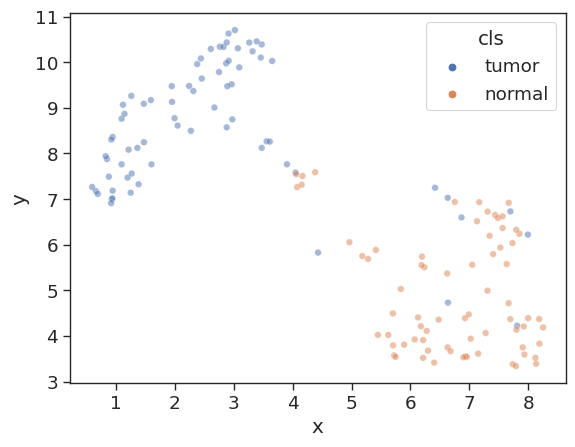

In [4]:
# batch correction (with the training data) - quantile normalization (Use the distribution of the training data as a target distribution)
preprocessed_data, obs = pairing.preprocess(adata_landmark, umap_plot=True)

In [5]:
initial_state = preprocessed_data[obs['state']=='tumor']
desired_state = preprocessed_data[obs['state']=='normal']

# Finding perturbations capable of inducing desired states

* [initial_state -> desired_state]
* pert_type = {'all': compound, shRNA, 'compound': only compound, 'shRNA': only shRNA}

In [6]:
result = pairing.find_perturbation(initial_state, desired_state, pert_type='shRNA')

Initial state shape:  (72, 976) Desired state shape:  (72, 976)


100%|████████████████████████████████████████████████████████████████████████████| 3934/3934 [28:01<00:00,  2.34it/s]


In [7]:
result

,Perturbation agents,score
3933,PSMD2_sh,0.611115
3932,C19ORF6_sh,0.602790
3931,CD3D_sh,0.601353
3930,PSMB7_sh,0.594305
3929,TMED10_sh,0.590898
...,...,...
4,HIST1H2AL_sh,0.140093
3,FRS2_sh,0.124116
2,PKIA_sh,0.116843
1,ETV6_sh,0.100014


In [ ]:
# For pert_type='compound', you can check the targets of the top-ranked perturbations.
result_mol = result.loc[np.isin(result['Perturbation agents'], pairing.mol_meta_tar.index)]

topk = 10
result_mol_top = pairing.mol_meta_tar.loc[result_mol['Perturbation agents'].values[:topk]][['pert_name', 'target', 'moa']]
result_mol_top['score'] = result_mol['score'].values[:topk]
# topk promising perturbations
result_mol_top

# Gene expression change simulation

* [initial_state] -> [perturbed state] (e.g. C19ORF6_sh) gene expression change simulation

In [8]:
whole_gen, genesymbol, summary_gen_df = pairing.gene_expression_pert_simulation(initial_state, 'C19ORF6_sh')

In [9]:
# index=0 - [initial_state]
# index=100 - [perturbed_state]
summary_gen_df

,DDR1,PAX8,RPS5,ABCF1,SPAG7,RHOA,RNPS1,SMNDC1,ATP6V0B,RPS6,...,FGFBP1,THOC1,REC8,HNRNPDL,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2
0,6.785378,5.513560,7.041578,10.742871,9.596881,8.326091,13.074678,8.725819,7.471108,14.109304,...,5.061330,9.431467,5.934687,10.304086,7.861796,5.289860,4.808239,6.160532,8.028205,9.039528
1,6.790158,5.519543,7.033767,10.745071,9.589739,8.317758,13.079918,8.727471,7.471095,14.112863,...,5.057859,9.430285,5.930168,10.300041,7.857761,5.299927,4.807224,6.159615,8.036213,9.048662
2,6.794563,5.521957,7.024723,10.743979,9.583016,8.306966,13.085616,8.732122,7.470965,14.115366,...,5.052805,9.429365,5.927459,10.295398,7.855279,5.313943,4.804049,6.156970,8.040924,9.054833
3,6.800397,5.525113,7.014932,10.743208,9.574619,8.296523,13.092263,8.734853,7.473949,14.120322,...,5.047936,9.428149,5.918318,10.292438,7.850095,5.331923,4.799086,6.153352,8.045323,9.063621
4,6.804684,5.527484,7.005490,10.745177,9.567565,8.287065,13.098268,8.737263,7.474004,14.123483,...,5.044365,9.428670,5.911954,10.289082,7.846947,5.342487,4.795875,6.150120,8.050822,9.071988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7.407958,5.596550,6.030083,11.045292,9.391312,7.288074,13.359591,8.910072,7.523956,14.195580,...,4.065074,9.192845,5.708923,9.887539,7.715041,5.996958,4.629680,5.806655,8.902505,9.645610
97,7.413522,5.593507,6.024025,11.047007,9.395013,7.281087,13.356744,8.907959,7.521883,14.192356,...,4.061534,9.190773,5.715223,9.881664,7.716658,6.009986,4.630248,5.804678,8.910154,9.647741
98,7.416499,5.591595,6.017340,11.050098,9.400197,7.276806,13.354948,8.906530,7.520620,14.190092,...,4.060569,9.187047,5.718418,9.875984,7.718884,6.008791,4.631100,5.798858,8.920235,9.651681
99,7.420980,5.590454,6.012866,11.052956,9.402771,7.271963,13.353098,8.907414,7.518721,14.188217,...,4.053917,9.185909,5.721030,9.871513,7.718679,6.014858,4.634211,5.798134,8.927678,9.655382


In [10]:
import decoupler as dc

In [11]:
base_idx = 0    # initial state
pert_idx = -1   # post-perturbation state

base_dat = whole_gen[base_idx]
pert_dat = whole_gen[pert_idx]

In [12]:
# Output of the PAIRING only include landmark genes
# Infer the expression of other genes expression based on landmark genes (BING - https://www.sciencedirect.com/science/article/pii/S0092867417313090?via%3Dihub)
base_bing_genes, _ = pairing.calc_bing(base_dat)
pert_bing_genes, _ = pairing.calc_bing(pert_dat)
bing_genes = np.concatenate((base_bing_genes, pert_bing_genes), axis=0)
bing_genes[bing_genes<0] = 0

bing_genes = pd.DataFrame(bing_genes,
                          index=np.concatenate(([str(_)+'_base' for _ in np.arange(base_bing_genes.shape[0])],
                                                [str(_)+'_pert' for _ in np.arange(pert_bing_genes.shape[0])])),
                          columns=genesymbol)

bing_genes_ad = ad.AnnData(bing_genes, dtype=np.float32)
bing_genes_ad.var_names_make_unique()

# Process treatment information
bing_genes_ad.obs['condition'] = ['control' if 'base' in sample_id else 'treatment' for sample_id in bing_genes_ad.obs.index]

# Process sample information
bing_genes_ad.obs['sample_id'] = [sample_id.split('_')[0] for sample_id in bing_genes_ad.obs.index]

In [13]:
bing_genes_ad.obs

,condition,sample_id
0_base,control,0
1_base,control,1
2_base,control,2
3_base,control,3
4_base,control,4
...,...,...
715_pert,treatment,715
716_pert,treatment,716
717_pert,treatment,717
718_pert,treatment,718


In [14]:
# DEG
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
pvalues = []
log_fold_changes = []
for gene in bing_genes_ad.var_names:
    data = pd.concat([pd.Series(bing_genes_ad[:, gene].X.toarray().flatten(), index=bing_genes_ad.obs.index), bing_genes_ad.obs['condition']], axis=1)
    data.columns = ['expression', 'condition']

    condition_1_expression = data.loc[data['condition'] == 'control', 'expression']
    condition_2_expression = data.loc[data['condition'] == 'treatment', 'expression']

    p = mannwhitneyu(condition_1_expression, condition_2_expression)[1]
    log_fold_change = np.log2((condition_2_expression.mean() + 1) / (condition_1_expression.mean() + 1))

    pvalues.append(p)
    log_fold_changes.append(log_fold_change)

# adjust p-values using FDR
fdr = multipletests(pvalues, method='fdr_bh')[1]

# combine p-values, adjusted p-values and log fold changes into a DataFrame for easy viewing
results_df = pd.DataFrame({
    'gene': bing_genes_ad.var_names,
    'p_value': pvalues,
    'fdr': fdr,
    'log_fold_change': log_fold_changes
})
results_df.index = results_df['gene']

In [16]:
# positive - larger in treatment, negative - smaller in control
mat = results_df[['log_fold_change']].T.rename(index={'log_fold_change': 'treatment.vs.control'})
mat

gene,DDR1,PAX8,RPS5,ABCF1,SPAG7,RHOA,RNPS1,SMNDC1,ATP6V0B,RPS6,...,FGFBP1,THOC1,REC8,HNRNPDL,PPP4R1,CDH1,SLC12A6,PTBP3,DGCR2,SCO2
treatment.vs.control,0.113569,0.017227,-0.199281,0.037949,-0.025929,-0.17382,0.027944,0.02624,0.008125,0.007256,...,-0.261685,-0.034742,-0.04407,-0.057084,-0.022968,0.156932,-0.043955,-0.076189,0.138588,0.086155


In [ ]:
# Retrieve CollecTRI gene regulatory network
collectri = dc.get_collectri(organism='human', split_complexes=False)
collectri

In [38]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
pd.concat((tf_acts, tf_pvals), axis=0)

Running ulm on mat with 1 samples and 10172 targets for 682 sources.


,ABL1,AEBP1,AHR,AIP,AIRE,AP1,APEX1,AR,ARID1A,ARID1B,...,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91,ZXDC
treatment.vs.control,2.310774,1.232987,-0.306905,-2.96641,-0.200166,-3.988660,-0.372071,1.189941,2.027179,0.207603,...,0.098141,3.310265,-0.074512,-1.551668,1.445721,-0.260145,-1.356467,-0.564996,1.047681,-0.290871
treatment.vs.control,0.020865,0.217609,0.758922,0.00302,0.841355,0.000067,0.709848,0.234097,0.042670,0.835543,...,0.921822,0.000935,0.940604,0.120773,0.148286,0.794757,0.174981,0.572089,0.294810,0.771156


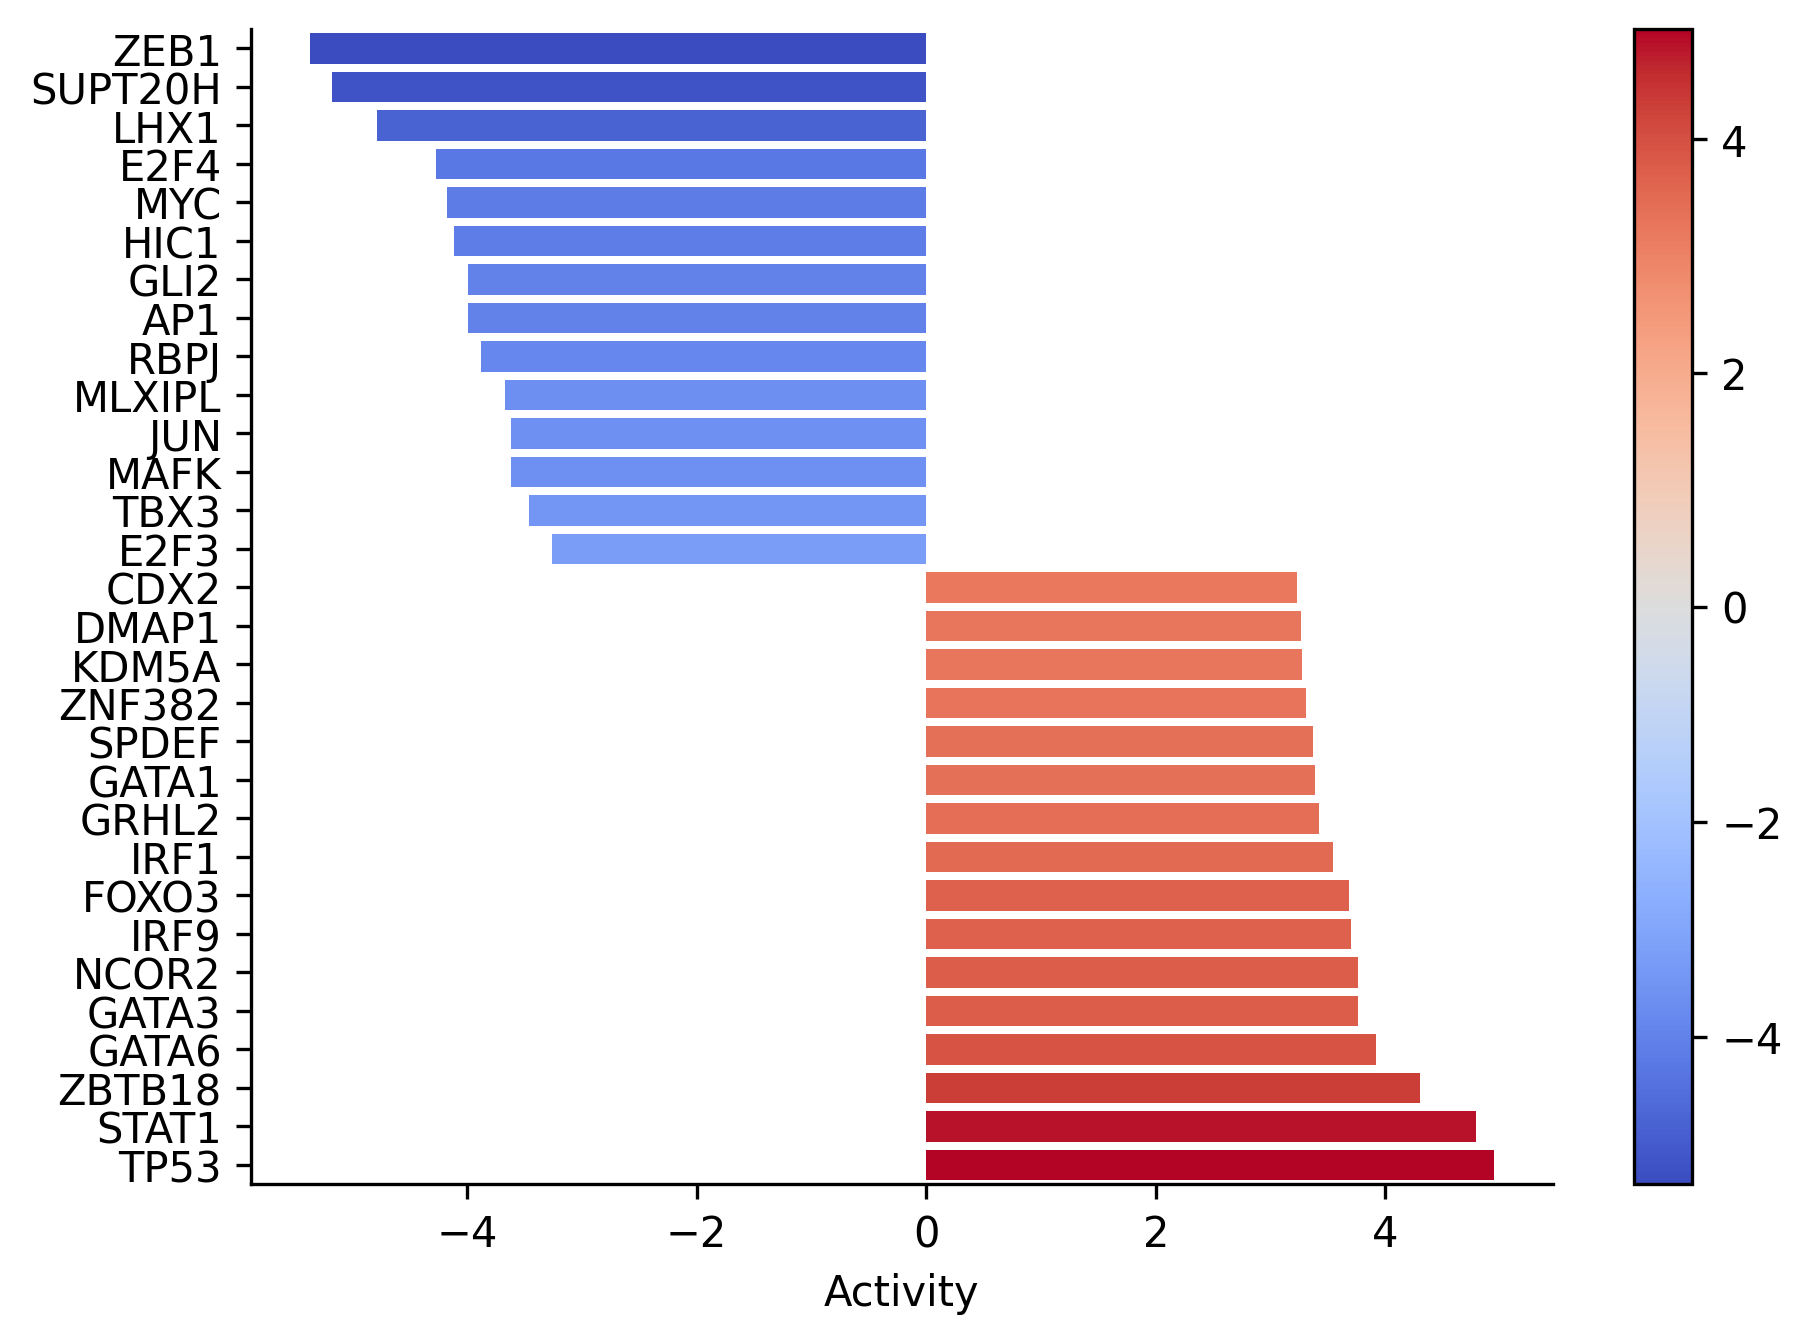

In [39]:
dc.plot_barplot(tf_acts, 'treatment.vs.control', top=30, vertical=True, dpi=300)

In [ ]:
dc.plot_targets(results_df, stat='log_fold_change', source_name='XBP1', net=collectri, top=15)

In [40]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [41]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pd.concat((pathway_acts, pathway_pvals), axis=0)

Running mlm on mat with 1 samples and 10172 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
treatment.vs.control,-0.151777,-0.833481,-6.196876e+00,2.481922,4.009998,-6.838785e+00,-3.426093,-3.938241,-1.075216,3.847932,-0.303178,1.029738,-1.139656,9.510778
treatment.vs.control,0.879366,0.404593,5.982983e-10,0.013084,0.000061,8.446355e-12,0.000615,0.000083,0.282304,0.000120,0.761760,0.303157,0.254456,0.000000


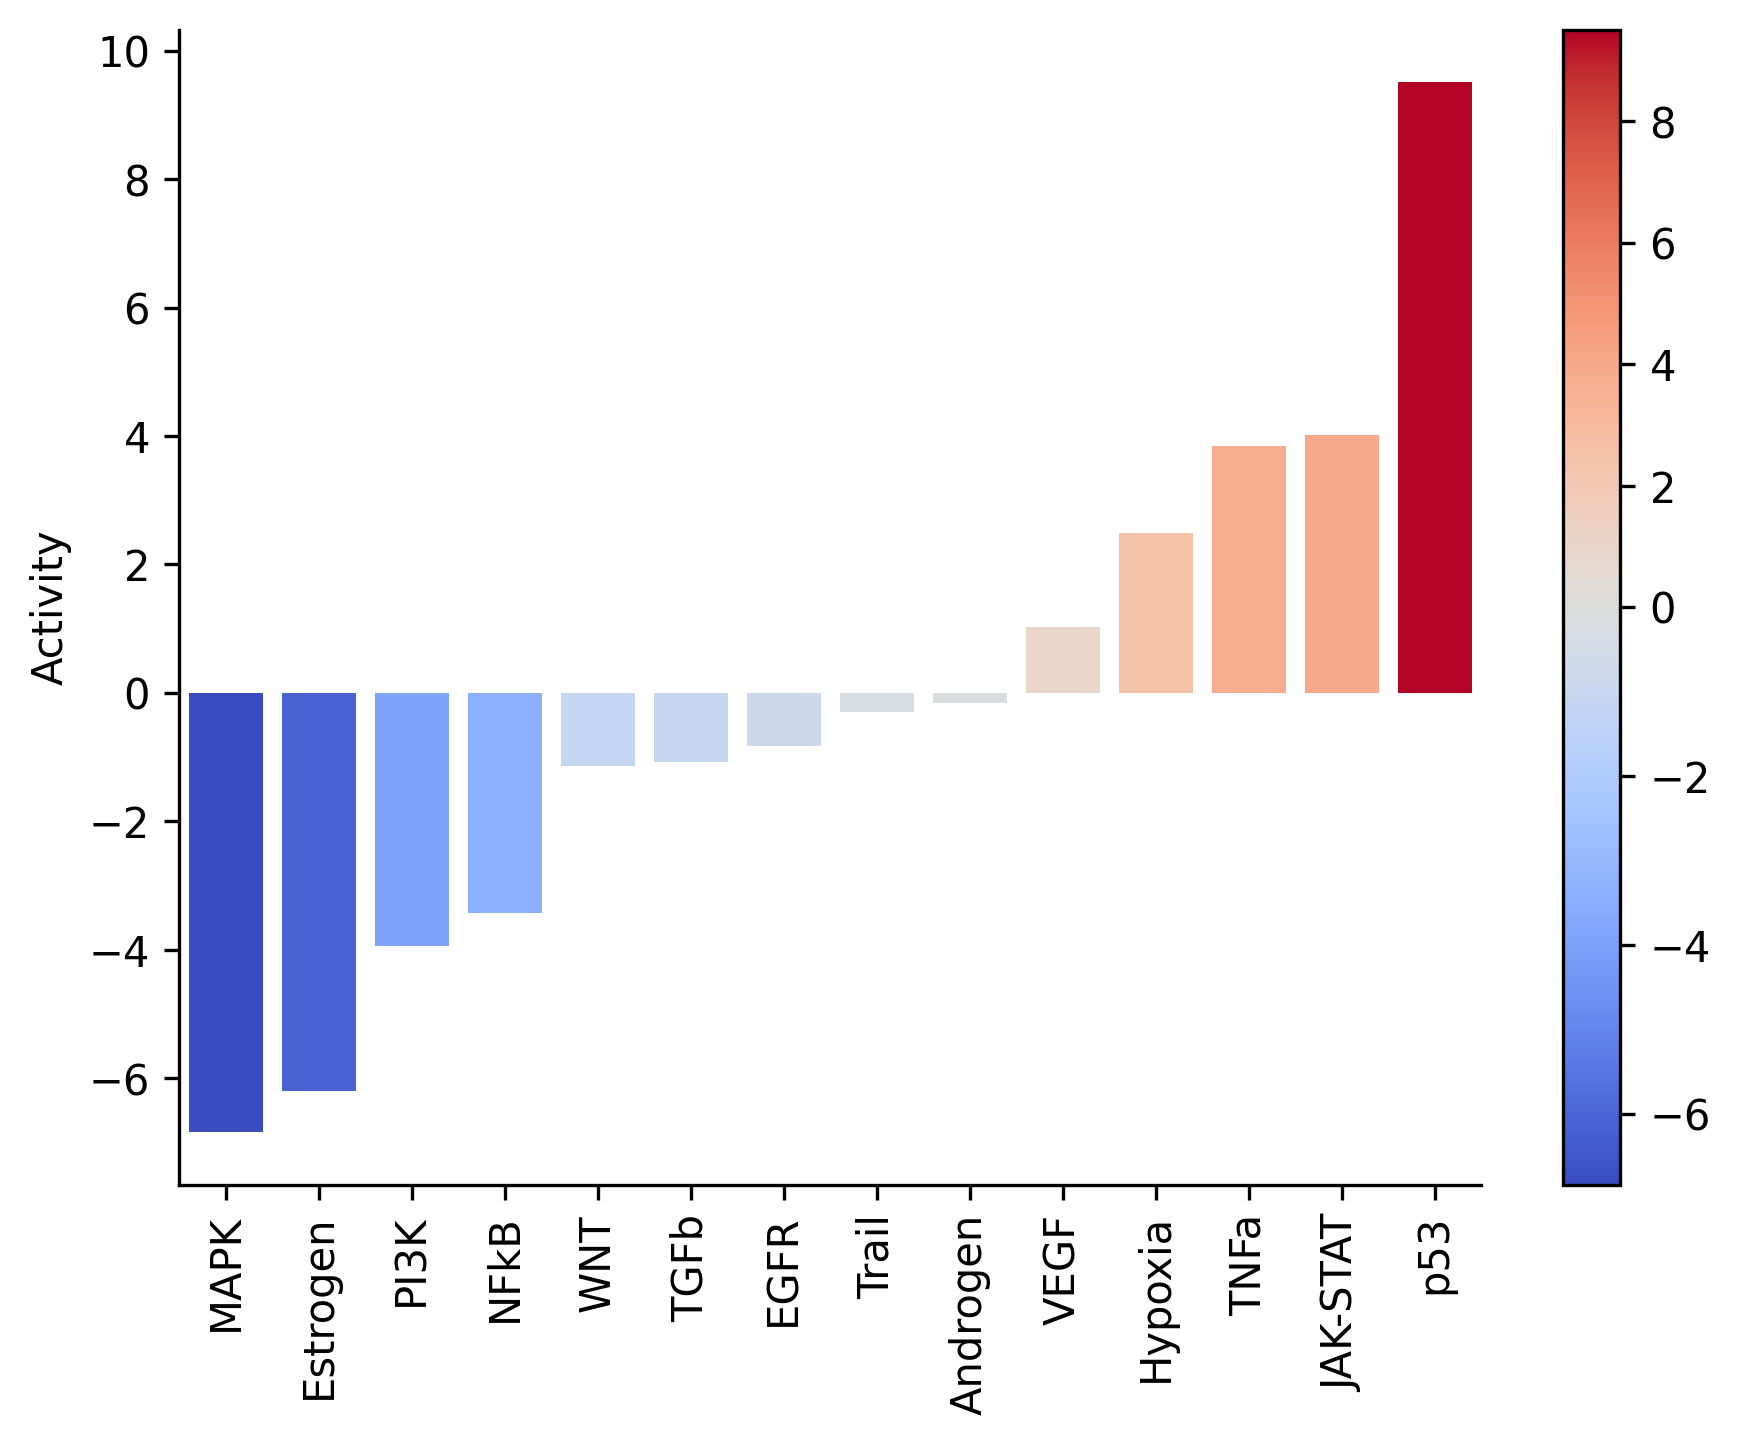

In [42]:
dc.plot_barplot(pathway_acts, 'treatment.vs.control', top=25, vertical=False, dpi=300)